In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##Assign artificial data##
Y = np.array([1., -1., -1., 1., 1., 
              -1., -1., 1., 1., -1.,
              -1., -1., 1., 1., 1., 
              -1., -1., -1., 1., 1.])
print("Y=")
print(Y)
##5(X1)+8(X2)+1=0 -> X2= -5/8(X1)-1/8##
X1 = np.random.rand(20)*20-10
print("X1=")
print(X1)
X2 = ( X1*(-5)/8 )-(1/8)
ran = np.random.rand(20)*10
X2[Y==1] = X2[Y==1] + ran[Y==1]
X2[Y==-1] = X2[Y==-1] - ran[Y==-1]
print("X2=")
print(X2)

Y=
[ 1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1.
  1.  1.]
X1=
[ 4.18545556 -8.03253392 -9.68608215 -2.334286   -2.8050569  -2.10177396
 -0.37200867  8.59584232  4.01662077  8.22808526  2.10944533  6.16841068
 -4.38440953 -1.63670494 -6.03665267 -2.18377    -5.02581284 -3.89940047
 -6.4896291   4.85045524]
X2=
[  2.4889376   -2.76818596  -2.07514272   4.2907875    7.1712109
  -3.08601149  -5.87710581   0.14670061  -0.17045009  -9.03416672
  -2.572592   -11.14178964  12.24613364   7.91667746   4.60349154
  -8.53457355  -1.75212505  -3.51741446   3.98524468   4.44166427]


In [3]:
##ploting sub_function##
def plot_out(w0,w1,w2):
    ##plot data##
    fig=plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(X1[Y==1],X2[Y==1], s=50, c='b', marker="o")
    plt.scatter(X1[Y==-1],X2[Y==-1], s=50, c='r', marker="x")
    ##plot line##
    o_fill_x, o_fill_y = [0, 0, 0, 0], [0, 0, 0, 0]
    x_fill_x, x_fill_y = [0, 0, 0, 0], [0, 0, 0, 0]
    if w2!=0:
        y1,y2= (-w1*(-15)/w2)-(w0/w2), (-w1*15/w2)-(w0/w2)
        o_fill_x, o_fill_y = [-15,15,15,-15], [y1,y2,15,15]
        x_fill_x, x_fill_y = [-15,15,15,-15], [y1,y2,-15,-15]
    plt.fill( o_fill_x, o_fill_y, 'b', alpha = 0.15)
    plt.fill( x_fill_x, x_fill_y, 'r', alpha = 0.15)
    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)
    ax.set_title("[w0, w1, w2] = [ "+str(w0)+", "+ str(w1)+", "+ str(w2)+" ]" )
    fig.set_size_inches(5,5)

    plt.show()

In [4]:
##perceptron sub_funciton##
def run_perceptron(w0,w1,w2,ite):
    ##check if there is any error
    err = np.where( (Y*(X1*w1+X2*w2+w0))<0 )
    err = err[0]
    if len(err)!=0:
        print(">>error at index=")
        print(err)
        w0 = w0 + Y[err[0]]
        w1 = w1 + Y[err[0]] * X1[err[0]]
        w2 = w2 + Y[err[0]] * X2[err[0]]
        ite=ite+1
        print(">>result after PLA =")
    else:
        print(">>no error")
        
    return [w0,w1,w2,ite]

>>iteration = 0. Perceptron Learning Algorithm starts...


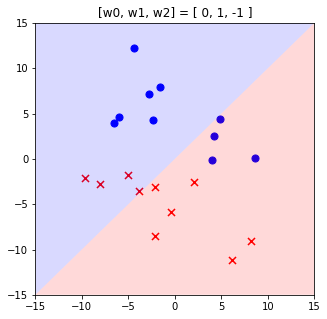

In [5]:
##plot default##
w0,w1,w2 = 0,1,-1
print(">>iteration = 0. Perceptron Learning Algorithm starts...")
plot_out(w0,w1,w2)

>>iteration=1
>>error at index=
[ 3  4  5  6  9 10 11 12 13 14 15 18]
>>result after PLA =


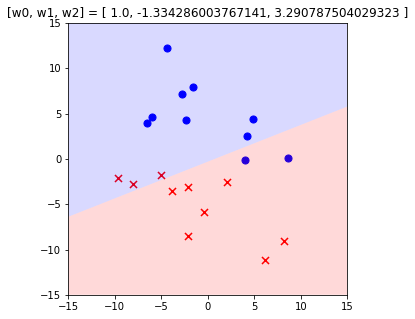

>>iteration=2
>>error at index=
[ 1  2  7  8 16]
>>result after PLA =


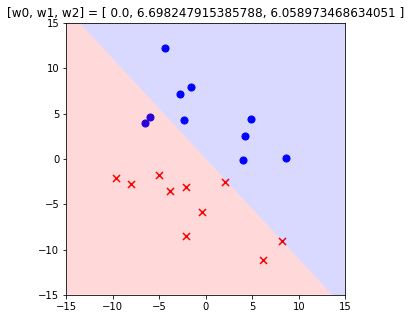

>>iteration=3
>>error at index=
[ 9 14 18]
>>result after PLA =


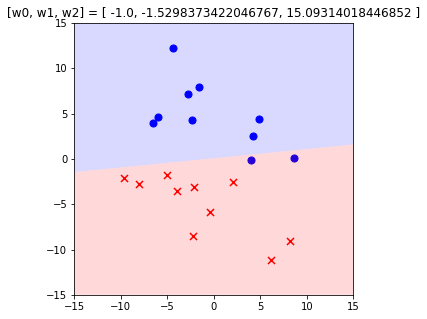

>>iteration=4
>>error at index=
[7 8]
>>result after PLA =


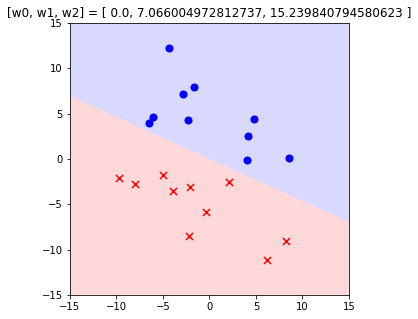

>>iteration=5
>>no error

Perceptron Learning Algorithm done!


In [6]:
##run perceptron##
for i in range(0,1000,1):
    print(">>iteration="+ str(i+1) )
    ret = run_perceptron(w0,w1,w2,i+1)
    w0,w1,w2 = ret[0], ret[1], ret[2]
    if (i+1)==ret[3]:
        break
    plot_out(w0,w1,w2)
        
print("\nPerceptron Learning Algorithm done!")